# Brief Introduction

###### Clarification: Here is a self-initiative mini project for practice purpose by using public data without leaking any confidential information from any company (clarify by: Ho Weng Tim)


The bank management team would like to build and train a simple deep neural network model to predict the likelihood of a liability customer (depositor) buying personal loans based on customer features like age, experience, income, locations, family, education, existing mortgage and credit card etc. Most bank customers are depositors and the bank would like to start targeting those customers and issue personal loans to them. The bank would like to retain those depositors and converts them to personal loan customers and therefore growing annual revenue. The bank management team would like to analyze the campaign results and develop a model to target customers who have high probability of obtaining personal loans. 

In this hands-on project, we will build and train a simple deep neural network model to predict the approval of personal loans for bank customers based on their features such as age, experience, income, locations, family, education, exiting mortgage, and credit card information. In this project, we will:

•	Perform exploratory data analysis <br>
•	Apply Python libraries to import and visualize dataset. <br>
•	Split and Standardize training and testing dataset <br>
•	Understand the theory and intuition behind Deep Neural Networks. <br>
•	Build a simple Multi Layer Neural Network model <br>
•	Compile and fit Deep Learning model to training data. <br>
•	Assess the performance of trained deep learning model and ensure its generalization using various KPIs such as accuracy, precision and recall.


# Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Import csv file 

df = pd.read_csv(r'D:\Desktop\Weng Tim Data Science Profile\Bank Loan Approval Prediction with Artificial Neural Networks\UniversalBank.csv')

In [20]:
df.shape

# Explore the number of rows and column in the dataset

(5000, 14)

In [70]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

Based on the output, it can be seen that there are total 5000 rows and 14 columns in the dataset. 

In [8]:
df.head()

# Explore the first five rows of the dataframe

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [12]:
df.info()

# Understand the basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Based on the output, it shown that there are 13 columns are integer format while 1 column is float format. 

Features:

- ID: Customer ID <br>
- Age: Customer's age in years <br>
- Experience: Number of years of professional experience <br>
- Income: Annual income of customer <br>
- ZIPCode: Home Address ZIP code <br>
- Family: Family size of the customer <br>
- CCAvg: Average spending on credit cards per month <br>
- Education: Education Level (1:Undergrad; 2: Graduate; 3:Advanced/Professional) <br>
- Mortgage: Value of house mortgage <br>
- Personal Loan: Did this customer accept the personal loan offered in the last campaign or not? <br>
- Securities Account: Does the customer have a securities account with the bank? <br>
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank? <br>
- Online: Does the customer use internet banking facilities? <br>
- Credit Card: Does the customer uses a credit card issued by Universe Bank?


In [13]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [15]:
df.describe().T
# For better visualization

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [38]:
# Check missing value

df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

There is no missing value in the dataset

In [26]:
creditcard_customers = df[df['CreditCard']== 1]
creditcard_customers

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
15,16,60,30,22,95054,1,1.5,3,0,0,0,0,1,1
19,20,55,28,21,94720,1,0.5,2,0,0,1,0,0,1
24,25,36,11,152,95521,2,3.9,1,159,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4984,4985,27,1,98,94043,4,2.3,3,0,0,0,0,0,1
4988,4989,34,8,85,95134,1,2.5,1,136,0,0,0,0,1
4990,4991,55,25,58,95023,4,2.0,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.9,2,100,0,0,0,0,1


In [34]:
# Determine how many percent of the customer do have credit card
creditcard_cust_percent = (len(creditcard_customers)/len(df))*100
print('Percentage of customer who own a credit card is ', creditcard_cust_percent, '%')

Percentage of customer who own a credit card is  29.4 %


H:\Users\Timtim\OneDrive\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


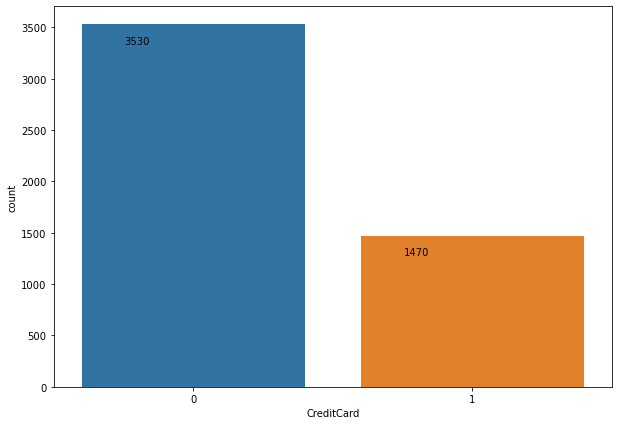

In [54]:
plt.figure(figsize = (10,7))
ax=sns.countplot(df['CreditCard'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)

Based on the information, there are 29.4% which is only 1470 of the customer do have credit card. 

In [59]:
# Determine how many percent of the customer accept personal loan

personal_loan = df[df['Personal Loan']==1]
no_personal_loan = df[df['Personal Loan']==0]

In [50]:
# Determine how many percent of the customer do have personal loan
personal_loan_percent = (len(personal_loan)/len(df))*100
print('Percentage of customer who accept personal loan is' , personal_loan_percent, '%')

Percentage of customer who accept personal loan is 9.6 %


H:\Users\Timtim\OneDrive\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


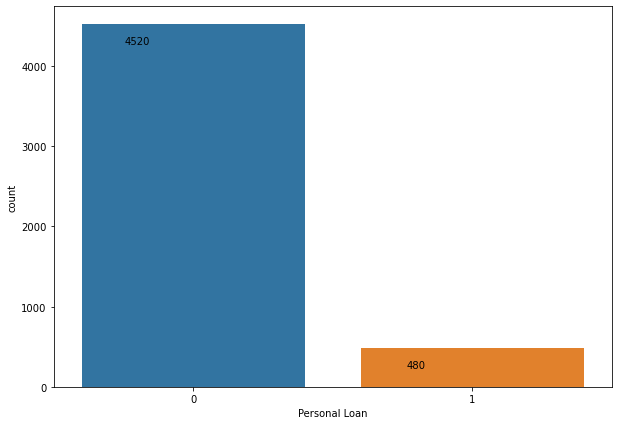

In [49]:
plt.figure(figsize = (10,7))
ax=sns.countplot(df['Personal Loan'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)

In [60]:
personal_loan.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.000000,480.000000,480.00000,480.000000
mean,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,1.0,0.125000,0.291667,0.60625,0.297917
std,1394.393674,11.590964,11.582443,31.584429,1759.223753,1.115393,2.097681,0.753373,160.847862,0.0,0.331064,0.455004,0.48909,0.457820
min,10.000000,26.000000,0.000000,60.000000,90016.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
25%,1166.500000,35.000000,9.000000,122.000000,91908.750000,2.000000,2.600000,2.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
50%,2342.000000,45.000000,20.000000,142.500000,93407.000000,3.000000,3.800000,2.000000,0.000000,1.0,0.000000,0.000000,1.00000,0.000000
75%,3566.000000,55.000000,30.000000,172.000000,94705.500000,4.000000,5.347500,3.000000,192.500000,1.0,0.000000,1.000000,1.00000,1.000000
max,4981.000000,65.000000,41.000000,203.000000,96008.000000,4.000000,10.000000,3.000000,617.000000,1.0,1.000000,1.000000,1.00000,1.000000


In [61]:
no_personal_loan.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.0,4520.000000,4520.000000,4520.000000,4520.000000
mean,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.0,0.102212,0.035841,0.595796,0.293584
std,1448.299331,11.450427,11.456672,40.578534,2156.949654,1.148771,1.567647,0.839975,92.038931,0.0,0.302961,0.185913,0.490792,0.455454
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1259.750000,35.000000,10.000000,35.000000,91911.000000,1.000000,0.600000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,2518.500000,45.000000,20.000000,59.000000,93437.000000,2.000000,1.400000,2.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,3768.250000,55.000000,30.000000,84.000000,94608.000000,3.000000,2.300000,3.000000,98.000000,0.0,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,8.800000,3.000000,635.000000,0.0,1.000000,1.000000,1.000000,1.000000


- Based on the output, most of the customer do not accept personal loan which consist 4520 customer while only 480 customers accept personal loan. <br>
- In overall, there are only 9.6% of customer accept personal loan. <br>
- Morover, it was found that customer who has personal loan has higher average annual income (144K) than customer who do not has personal loan (66K). <br>
- Beside, customer with personal loan has higher credit card spending with nearly 4K per month. <br>
- From those information, we can assume that people with higher income and higher credit card spending has a higher tendency to accept personal loan. <br>
- To clarify the assumption, further data visualization is carried out in the next step. 

H:\Users\Timtim\OneDrive\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\Users\Timtim\OneDrive\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

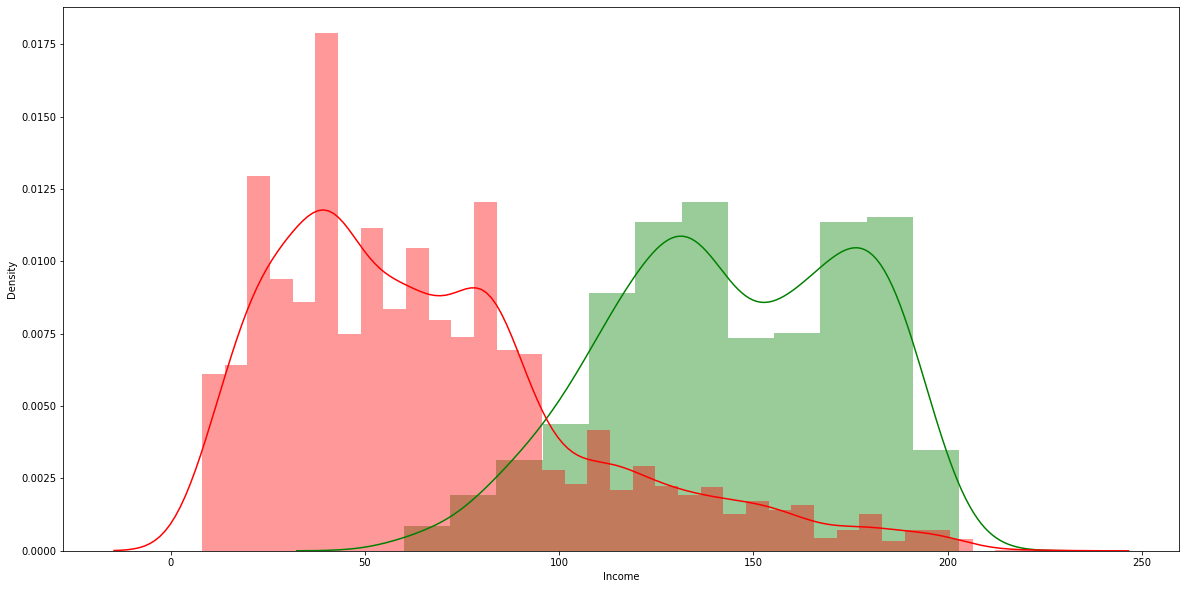

In [63]:
plt.figure(figsize = (20,10))
sns.distplot(personal_loan['Income'],color='g')
sns.distplot(no_personal_loan['Income'],color='r')

- Based on the distribution plot, it can be observed that people with higher income tend to belong to group that accept personal loan (green) while the people with lower income tend to belong to group that do not accept personal loan (red).

H:\Users\Timtim\OneDrive\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


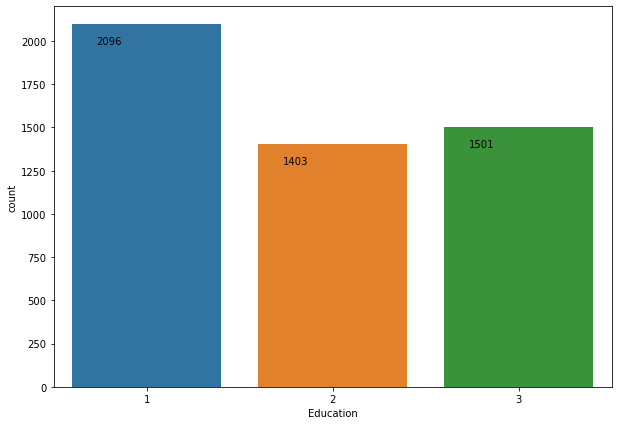

In [51]:
plt.figure(figsize = (10,7))
ax =sns.countplot(df['Education'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)

Most of the customer are undergrad follow by professional and graduate.

H:\Users\Timtim\OneDrive\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


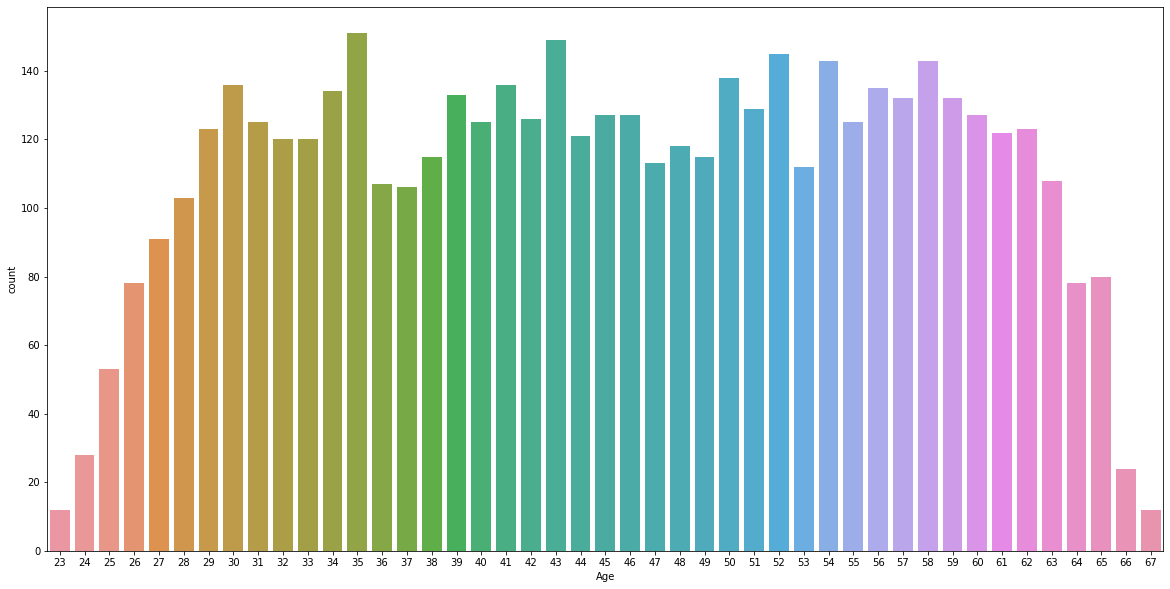

In [55]:
plt.figure(figsize = (20,10))
ax =sns.countplot(df['Age'])

Most of the customer are in range of 30 - 60 years old.

H:\Users\Timtim\OneDrive\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

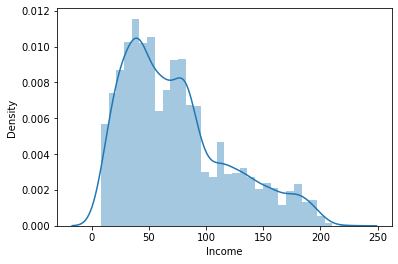

In [58]:
# Visualize income data

sns.distplot(df['Income'])

- Most customers have incomes that range between 45K and 60K per year <br>
- Data is skewed with less customers earning above 100K

H:\Users\Timtim\OneDrive\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

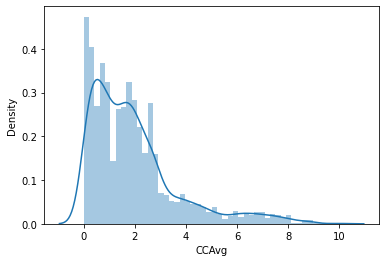

In [68]:
sns.distplot(df['CCAvg'])

Most customers' credit card spending fall between range of 0 - 2K

H:\Users\Timtim\OneDrive\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\Users\Timtim\OneDrive\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

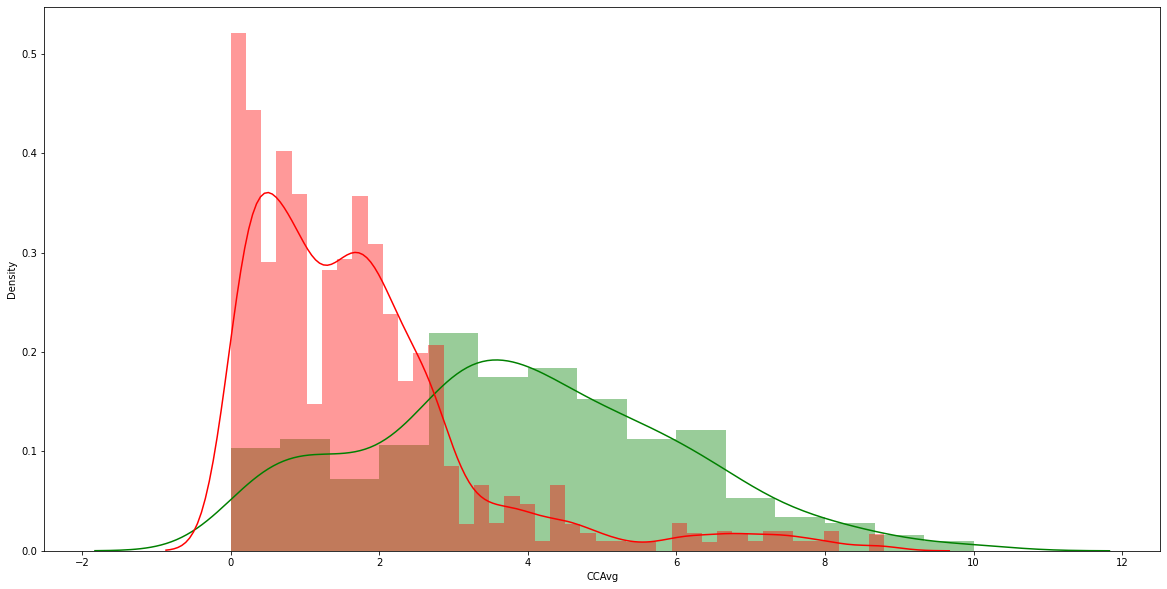

In [69]:
plt.figure(figsize = (20,10))
sns.distplot(personal_loan['CCAvg'],color='g')
sns.distplot(no_personal_loan['CCAvg'],color='r')

- Based on the distribution plot, it can be observed that people with higher credit card spending tend to belong under group that accept personal loan (green) while the people with lower credit card spending tend to belong under group that do not accept personal loan (red).

<AxesSubplot:>

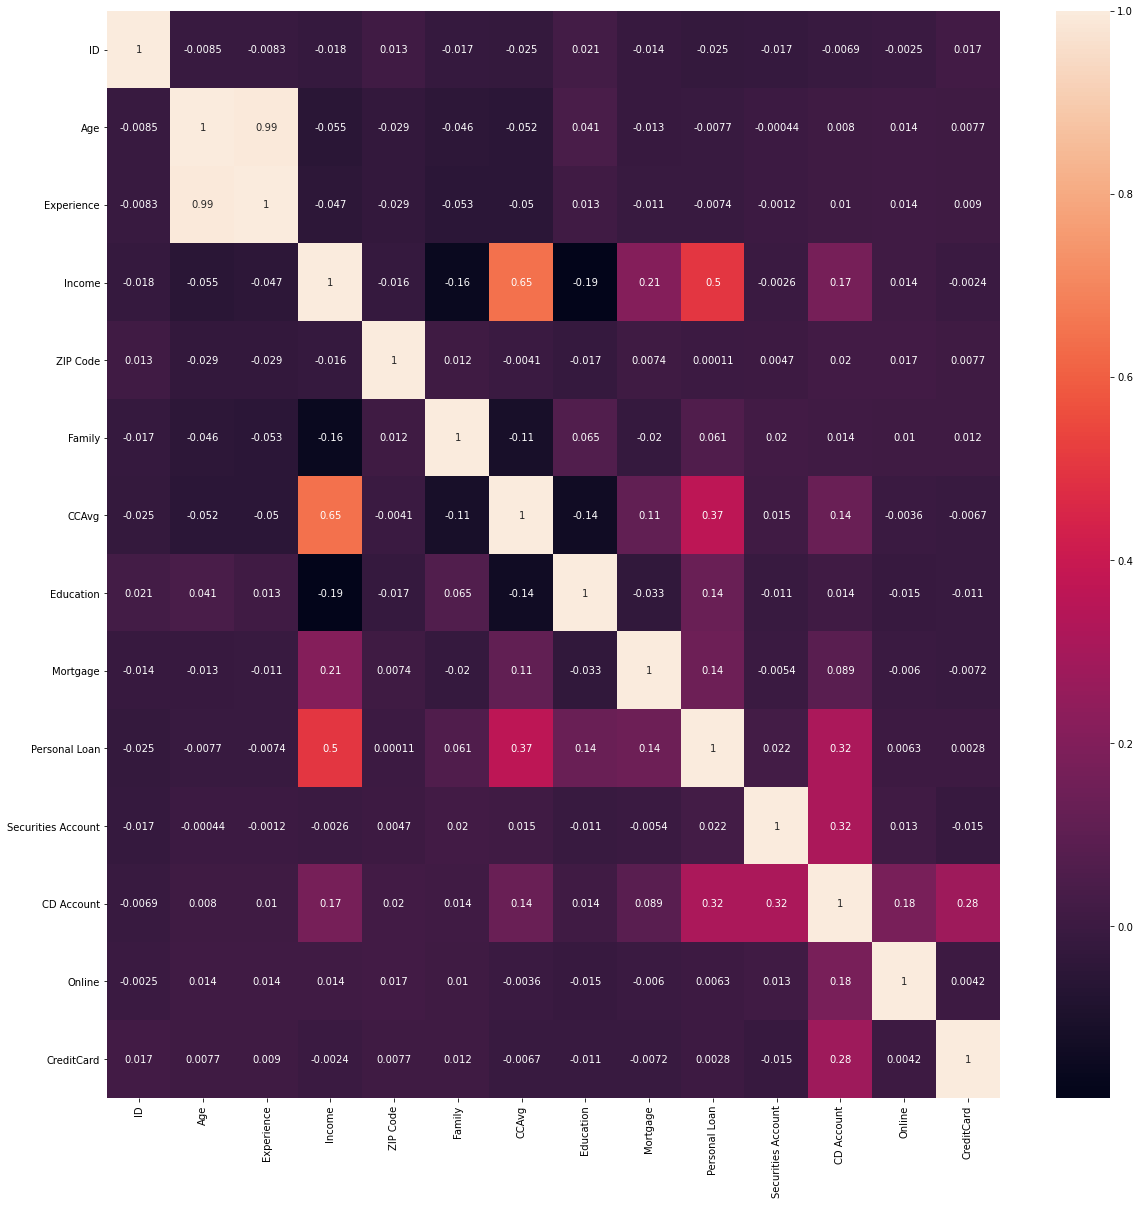

In [67]:
# Correlation
plt.figure(figsize = (20,20))
cm = df.corr()
sns.heatmap(cm, annot = True)

- Based on the heatmap above, we can found that there is stong positive correlation between experience and age; there is also strong positive correlation between CC average and income

# Data Preparation

In [71]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [78]:
x = df.drop(columns = ['Personal Loan'])
x

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [80]:
y = df['Personal Loan']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt

In [82]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [84]:
# scale the data before training the model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)

In [86]:
# spliting the data into testing and training sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [88]:
# print the shapes
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4000, 13), (1000, 13), (4000, 2), (1000, 2))

# Build a Simple Multi-layer Neural Network Model 

In [125]:
# Create keras sequential model
ANN_model = keras.Sequential()

# Add dense layer
ANN_model.add(Dense(250, input_dim = 13, kernel_initializer = 'normal',activation = 'relu'))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation = 'relu'))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation = 'relu'))

ANN_model.add(Dropout(0.4))
ANN_model.add(Dense(250, activation = 'linear'))

# Add dense layer with softmax activation
ANN_model.add(Dense(2, activation = 'softmax'))
ANN_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 250)               3500      
                                                                 
 dropout_25 (Dropout)        (None, 250)               0         
                                                                 
 dense_42 (Dense)            (None, 500)               125500    
                                                                 
 dropout_26 (Dropout)        (None, 500)               0         
                                                                 
 dense_43 (Dense)            (None, 500)               250500    
                                                                 
 dropout_27 (Dropout)        (None, 500)               0         
                                                                 
 dense_44 (Dense)            (None, 250)              

In [126]:
# Compile the model

ANN_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'] )

In [127]:
history = ANN_model.fit(x_train, y_train, epochs = 20, validation_split = 0.2, verbose = 1)

Epoch 1/20
100/100 [==============================] - 1s 9ms/step - loss: 0.1712 - accuracy: 0.9397 - val_loss: 0.1085 - val_accuracy: 0.9625
Epoch 2/20
100/100 [==============================] - 1s 7ms/step - loss: 0.0976 - accuracy: 0.9656 - val_loss: 0.0959 - val_accuracy: 0.9625
Epoch 3/20
100/100 [==============================] - 1s 7ms/step - loss: 0.0865 - accuracy: 0.9681 - val_loss: 0.0768 - val_accuracy: 0.9700
Epoch 4/20
100/100 [==============================] - 1s 7ms/step - loss: 0.0817 - accuracy: 0.9728 - val_loss: 0.0832 - val_accuracy: 0.9762
Epoch 5/20
100/100 [==============================] - 1s 7ms/step - loss: 0.0656 - accuracy: 0.9775 - val_loss: 0.0722 - val_accuracy: 0.9725
Epoch 6/20
100/100 [==============================] - 1s 7ms/step - loss: 0.0617 - accuracy: 0.9778 - val_loss: 0.0704 - val_accuracy: 0.9775
Epoch 7/20
100/100 [==============================] - 1s 7ms/step - loss: 0.0630 - accuracy: 0.9787 - val_loss: 0.0716 - val_accuracy: 0.9737
Epoch 

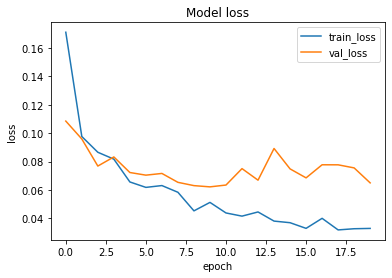

In [128]:
# Plot the model performance across epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

# Model Evaluation

In [129]:
# Make predictions
predictions = ANN_model.predict(x_test)

# Append the index of max value using argmax function
predict = []
for i in predictions:
    predict.append(np.argmax(i))

In [130]:
# Get the acccuracy of the model
result = ANN_model.evaluate(x_test, y_test)

print("Accuracy : {}".format(result[1]))

32/32 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9780
Accuracy : 0.9779999852180481


In [131]:
# Get the original values, to compare the original values with the prediction value
y_original = []

for i in y_test:
    y_original.append(np.argmax(i))

<AxesSubplot:>

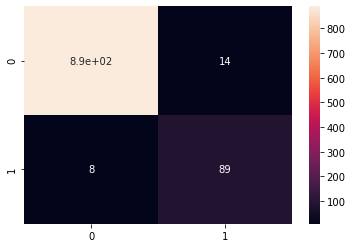

In [134]:
confusion_matrix = metrics.confusion_matrix(y_original, predict)
sns.heatmap(confusion_matrix, annot = True)

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_original, predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       903
           1       0.86      0.92      0.89        97

    accuracy                           0.98      1000
   macro avg       0.93      0.95      0.94      1000
weighted avg       0.98      0.98      0.98      1000



Based on the model evaluation, I found that the model has high accuracy, precision, recall and f1-score. It can be concluded that this is a good model which bring desire result. However, if you want to get a better result than this, a more variation of model need to be carried out either manually or using hyperparameter tuning. In conclusion, all the objective of the project is achieved. Thank you for reading. 